# Ch 6. Decision Tree

## Decision Tree Learning & Visualization

### Decision Tree Classification

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [2]:
from sklearn.tree import export_graphviz

export_graphviz( 
               tree_clf,
               out_file = r"C:\Users\jjun1\Desktop\Hands-on-Machine-Learning-master\이론 코드화\tree.dot",
               feature_names = iris.feature_names[2:],
               class_names = iris.target_names,
               rounded = True,
               filled = True
               )

# Anaconda Prompt를 관리자권한으로 실행 후 
- pip install graphviz   
를 해야함
   
그래도 안된다면 
- conda install python-graphviz    
를 설치

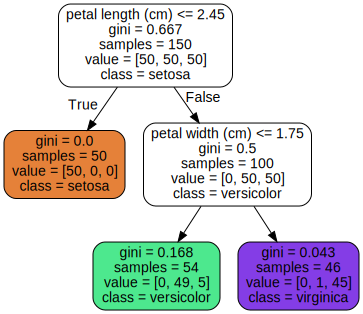

In [3]:
import graphviz
with open(r"C:\Users\jjun1\Desktop\Hands-on-Machine-Learning-master\이론 코드화\tree.dot", encoding = 'UTF-8') as f:
    dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename='tree', directory= r"C:\Users\jjun1\Desktop\Hands-on-Machine-Learning-master\이론 코드화", cleanup=True)
dot

# Sklearn은 CART Algorithm을 사용하여 Binary Tree만 가능
# ID3는 둘 이상의 child node를 가진 Decision Tree 가능

In [4]:
from id3 import Id3Estimator
from id3 import export_graphviz

In [5]:
from sklearn.datasets import load_breast_cancer

bunch = load_breast_cancer()

In [6]:
estimator = Id3Estimator()
estimator.fit(bunch.data, bunch.target)
export_graphviz(estimator.tree_, 'ID3tree.dot', bunch.feature_names)

<_io.TextIOWrapper name='ID3tree.dot' mode='w' encoding='utf8'>

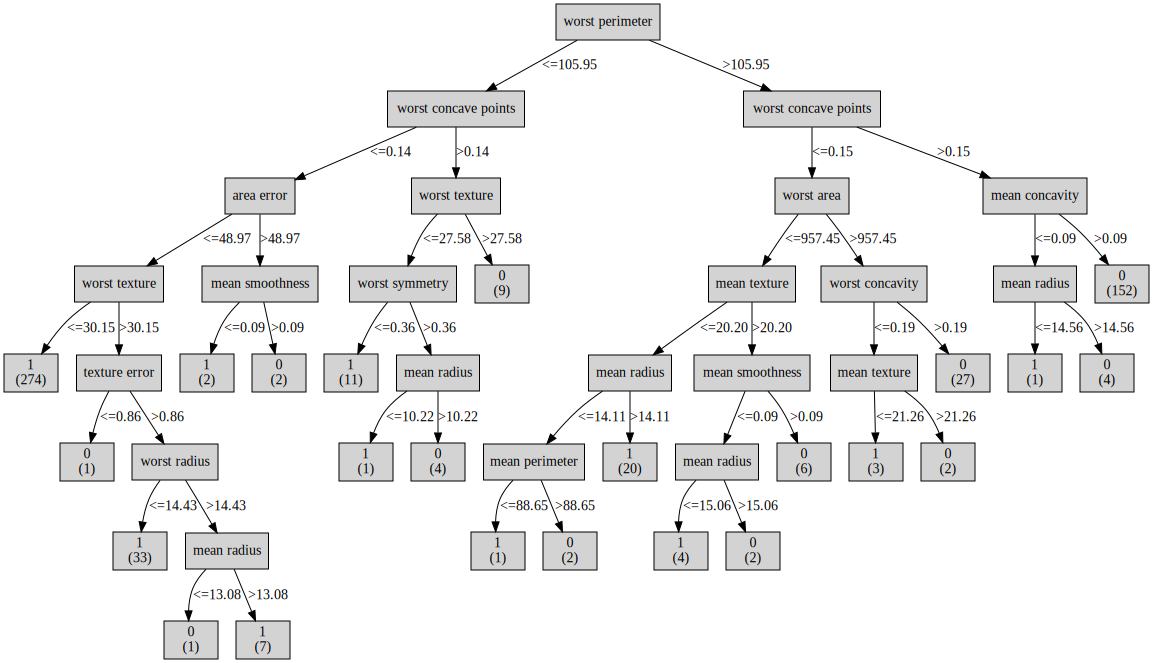

In [7]:
import graphviz
with open(r"C:\Users\jjun1\Desktop\Hands-on-Machine-Learning-master\이론 코드화\ID3tree.dot", encoding = 'UTF-8') as f:
    dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename='ID3tree', directory= r"C:\Users\jjun1\Desktop\Hands-on-Machine-Learning-master\이론 코드화", cleanup=True)
dot

## Decision Tree의 Decision Boundary

In [8]:
from matplotlib.colors import ListedColormap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### 한글 및 (-) 부호 깨짐 방지

In [9]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

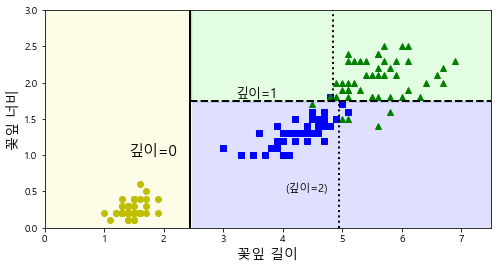

In [10]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("꽃잎 길이", fontsize=14)
        plt.ylabel("꽃잎 너비", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "깊이=0", fontsize=15)
plt.text(3.2, 1.80, "깊이=1", fontsize=13)
plt.text(4.05, 0.5, "(깊이=2)", fontsize=11)

plt.show()

CH 6. Decision Tree    
  ☐ Decision Tree    
    𝐎 특징    
      - Classification, Regression, Multi-Output 가능한 Machine Learning Algorithm.    
      - RandomForest의 기본 구성 요소    
      - Data의 전처리(특히, feature의 scale을 맞추거나 평균을 원점에 맞추는 작업)가 거의 필요하지 않다는 장점을 갖음    
      - sklearn은 Binary Tree만 만드는 CART Algorithm을 사용하므로 leaf node외의 모든 node는 자식 노드를 2개씩 가집니다.( 질문의 Yes or No) But ID3 같은 Algorithm은 둘 이상의 자식 노드를 가진 Decision Tree 생성 가능    
    𝐎 Decision Tree Learning & Visualization & Predict    
      - Learning & Visualization    







  - Predict     
   ㆍ 과정    
      1) root node에서 시작하여 2.45보다 짧은지 검사 후 결과에 맞게 child node로 이동    
      2) 이동한 node가 leaf node면 거기서 멈추고 child node를 갖고 있다면 해당 cell에 맞게 다시 검사 실시 후 결과에 맞게 이동   
      3) 1)과 2)를 반복    
   - Gini 속성은 impurity(불순도)를 측정   
   
     ⁕
    ex) deepth = 2인 left node의 gini score 
       



정의
예시
Whihte Box
예측과정이 간단하고 명확한 모델
Decision Tree
Black Box
예측과정에 대한 설명이 어려운 모델
RandomForest, Neural Network
 ※ Model 해석


    𝐎 Class 확률 추정
     - Decision Tree는 한 sample이 특정 class 에 속할 확률을 추정 가능함
      - Process 
       ㆍ leaf node를 찾기 위해 Tree를 탐색 후 그 node에 있는 class 의 훈련 sample의 비율을 반환
       ex) 길이가 5cm, 너비가 1.5cm인 꽃잎을 발견하여 이것의 종을 알기위해 분류기에 집어넣으면 위에 나와있는 시각화 자료를 통해 deepth = 2, left node라는 것을 알 수가 있음. [ 0, 0.907, 0.093] 으로 출력

종
확률
Setosa
0% (0/54)
Versicolor
90.7% (49/54)
Virgin
9.3% (5/54)


    𝐎 CART 훈련 Algorithm
      - sklearn은 Decision Tree를 훈련시키기 위해 CART Algorithm을 사용
      - 특징
        1) 탐욕적 Algorithm
        2) 맨 위 루트 노드에서 최적의 분할을 찾으며 각 단계에서 이 과정을 반복하며 현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도를 이어질 수 있을지 없을지를 고려하지 않음.
        3) 종종 납득할만한 훌륭한 Solution을 만들지만 최적의 Solution을 보장하지는 않음
        4) 최적의 Tree를 찾는 것은 NP-Complete 문제로 (exp(m)) 시간이 필요하기에 매우 작은 훈련 set에서도 적용하기 어려우므로 납득할만한 좋은 Solution으로만 만족해야함
      - Process가 간단
        1) 훈련 set 하나의 특성 의 임계값 를 사용해 두 개의 subset으로 분리
          (예를 들면 꽃잎의 길이 2.45cm)
        2) 를 고르는 방법은 크기에 따른 가중치가 적용된 가장 순수한 subset으로 나눌 수 있는 () 짝을 찾음
        3) 이 Algorithm을 최소화해야하는 Cost Function은 


        4) 훈련set을 성공적으로 둘로 나누었으면 같은 방식으로 subset을 나누는 것을 반복
        5) 이 과정을 hyperparameter로 정의한 max_depth가 되거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈춤.
※ Algorithm 중지에 관여하는 hyperparameter들 
  (min_sample_split, min_samples_leaf, min_weight_fraction_leaf, max_nodes)

    𝐎 계산 복잡도
      - 예측을 위해서는 Decision Tree를 root node부터 leaf node까지 탐색해야함
      - 일반적으로 트리는 거의 균형을 이루고 있으므로 결정트리를 탐색하기 위해서는 약 개의 node를 거쳐야 함
      - 각 node는 하나의 특성값만ㅇ 확인하기 때문에 예측이 필요한 전체 복잡도는 특성 수와 무관하게 
      - 큰 훈련 set를 다룰 때도 예측 속도가 매우 빠름
      -  But 훈련 Algorithm은 각 node에서 모든 훈련 sample의 모든 (max_feature가 지정 되었다면 그보다는 적은) 특성을 비교
      - 따라서 훈련 복잡도는 
      - 훈련 set이 수천 개 이하의 sample정도로 작을 경우 sklearn에서는 presort = True로 지정하면 미리 데이터를 정렬하여 훈련 속도를 높일 수가 있지만 클 경우에는 속도가 많이 느려짐

    𝐎  Entropy
      - 기본적으로 Gini Impurity가 사용 되지만 criterion hyperparameter를 “entropy”로 지정하여 entropy 불순도를 사용 가능
      - Machine Learning에서는 불순도의 측정법으로 주로 사용

 
    𝐎  Gini Impurity OR Entropy
      - Gini Impurity와 Entropy 중 큰 차이가 없어 비슷한 Tree를 만듦
     - Gini Impurity가 조금 더 계산이 빠르기에 기본값으로 좋음
     - Gini Impurity는 가장 빈도 높은 Class를 한쪽 가지로 고립시키는 경향이 있음
     - Entropy는 Gini Impurity에 비해 균형 잡힌 Tree를 만듦
    𝐎  규제 Hyperparameter
      - Decision Tree는 훈련 Data에 대한 제약사항이 거의 없음 (반대로 선형 model은 꼭 선형일 것이라 가정)
      - 제한을 두지 않으면 Tree가 훈련 data에 아주 가깝게 맞추려고 해서 대부분 Overfitting이 되기 쉬움
      - Decision Tree는 model parameter가 보통 많은 편 
      - 훈련 전에 parameter가 결정되지 않기 때문에 비parameter model이라고 함
      - model 구조가 data에 맞춰져서 고정되지 않고 자유로움
      - 선형 model 같은 parameter model은 미리 정의된 model parameter 수를 가지므로 자유도가 제한되고 Overfitting 될 위험이 줄어듦 (Undefitting 위험이 커짐)
      - 형태를 제한하는 hyperparameter로는 min_samples_split(분할 되기 위해 노드가 가져야하는 최소 샘플 수), min_samples_leaf (leaf node가 가지고 있어야 할 최소 sample 수), min_weight_fraction_leaf (min_samples_leaf와 같지만 가중치가 부여된 전체 sample 수에서의 비율), max_leaf_nodes (leaf node의 최대 수), max_features (각 node에서 분할에 사용할 특성의 최대 수)
※ min_으로 시작하는 hyperparameter를 증가 시키거나 max_로 시작하는 hyperparameter를 감소시키면 model에 규제가 커짐


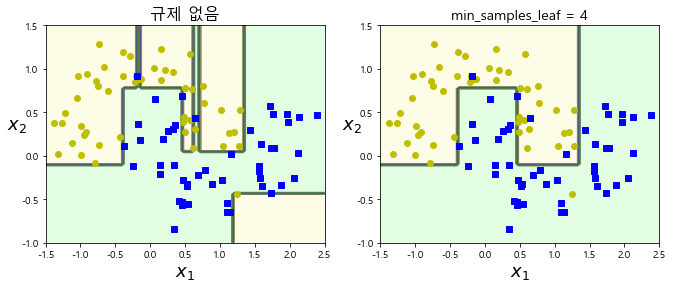

In [11]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("규제 없음", fontsize=16)
plt.savefig('규제없음.png', dpi=300)

plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.savefig('min_samples_leaf = 4', dpi=300)

plt.show()

In [12]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

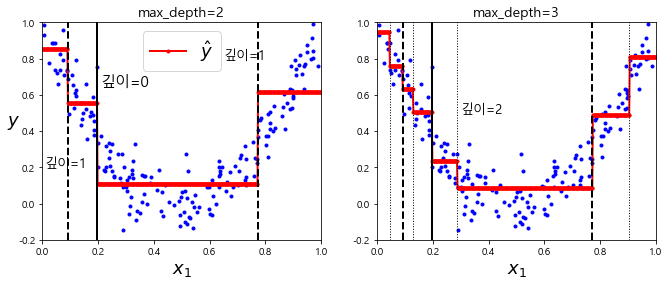

In [14]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "깊이=0", fontsize=15)
plt.text(0.01, 0.2, "깊이=1", fontsize=13)
plt.text(0.65, 0.8, "깊이=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "깊이=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.savefig("두 개의 Decision Tree Regression model 예측.jpg")
plt.show()

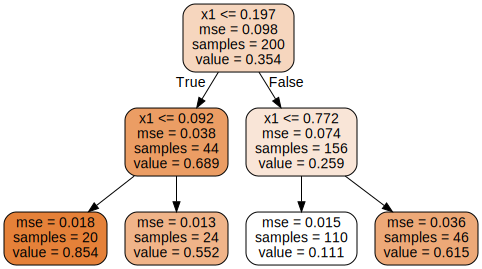

In [15]:
from sklearn.tree import export_graphviz

export_graphviz( 
               tree_reg1,
               out_file = r"C:\Users\jjun1\Desktop\Hands-on-Machine-Learning-master\이론 코드화\Regressiontree.dot",
               feature_names=["x1"],
               rounded = True,
               filled = True
               )

import graphviz
with open(r"C:\Users\jjun1\Desktop\Hands-on-Machine-Learning-master\이론 코드화\Regressiontree.dot", encoding = 'UTF-8') as f:
    dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename='Regressiontree', directory= r"C:\Users\jjun1\Desktop\Hands-on-Machine-Learning-master\이론 코드화", cleanup=True)
dot

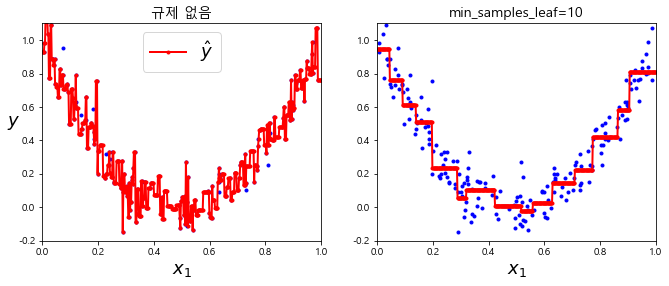

In [16]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("규제 없음", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.savefig("Decision Tree Regression Model 규제.jpg")
plt.show()

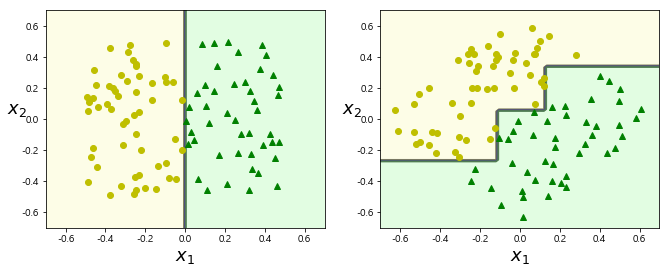

In [17]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.savefig("Train Set의 회전에 민감한 Decision Tree.jpg")
plt.show()

In [18]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장 너비가 큰 Iris-Versicolor

array([[4.8, 1.8]])

In [19]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

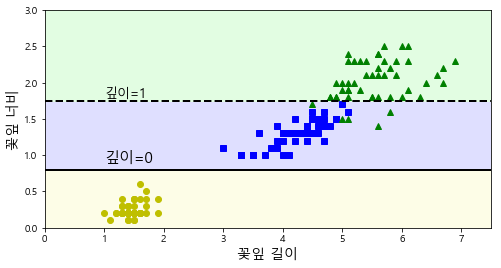

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "깊이=0", fontsize=15)
plt.text(1.0, 1.80, "깊이=1", fontsize=13)

plt.savefig("Train Set의 세부사항에 민감한 Decision Tree.jpg")
plt.show()